In [4]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [5]:
data=pd.read_csv(r"csv_files/cleaned_diabetes.csv")

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66,23,94,28.1,0.167,21,Not Diabetic
1,0,137,40,35,168,43.1,2.288,33,Diabetic
2,3,78,50,32,88,31.0,0.248,26,Diabetic
3,5,166,72,19,175,25.8,0.587,51,Diabetic
4,0,118,84,47,230,45.8,0.551,31,Diabetic


In [8]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
352,1,121,78,39,74,39.0,0.261,28,Not Diabetic
353,1,128,88,39,110,36.5,1.057,37,Diabetic
354,2,88,58,26,16,28.4,0.766,22,Not Diabetic
355,10,101,76,48,180,32.9,0.171,63,Not Diabetic
356,5,121,72,23,112,26.2,0.245,30,Not Diabetic


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               357 non-null    int64  
 1   Glucose                   357 non-null    int64  
 2   BloodPressure             357 non-null    int64  
 3   SkinThickness             357 non-null    int64  
 4   Insulin                   357 non-null    int64  
 5   BMI                       357 non-null    float64
 6   DiabetesPedigreeFunction  357 non-null    float64
 7   Age                       357 non-null    int64  
 8   Outcome                   357 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 25.2+ KB


In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

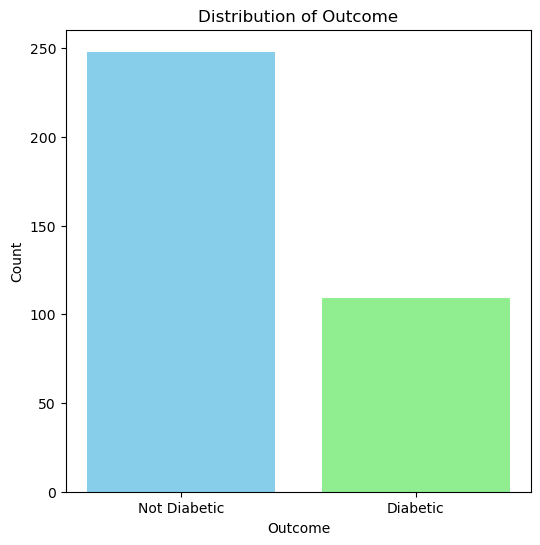

In [11]:
outcome_counts = data['Outcome'].value_counts()
plt.figure(figsize=(6, 6))
plt.bar(outcome_counts.index, outcome_counts.values, color=['skyblue', 'lightgreen'])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Outcome')
plt.xticks(outcome_counts.index, ['Not Diabetic', 'Diabetic'])
plt.show()

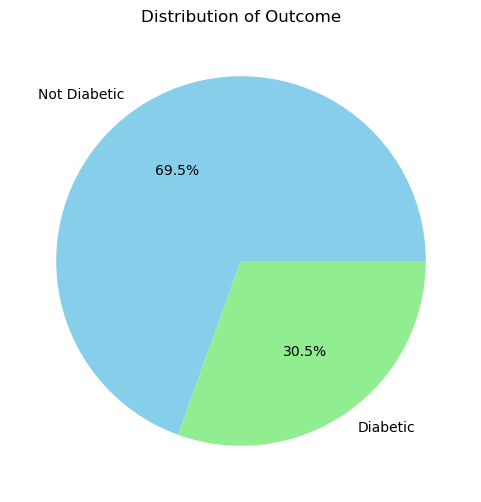

In [12]:
outcome_counts = data['Outcome'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Outcome')
plt.show()

C:\Users\maria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

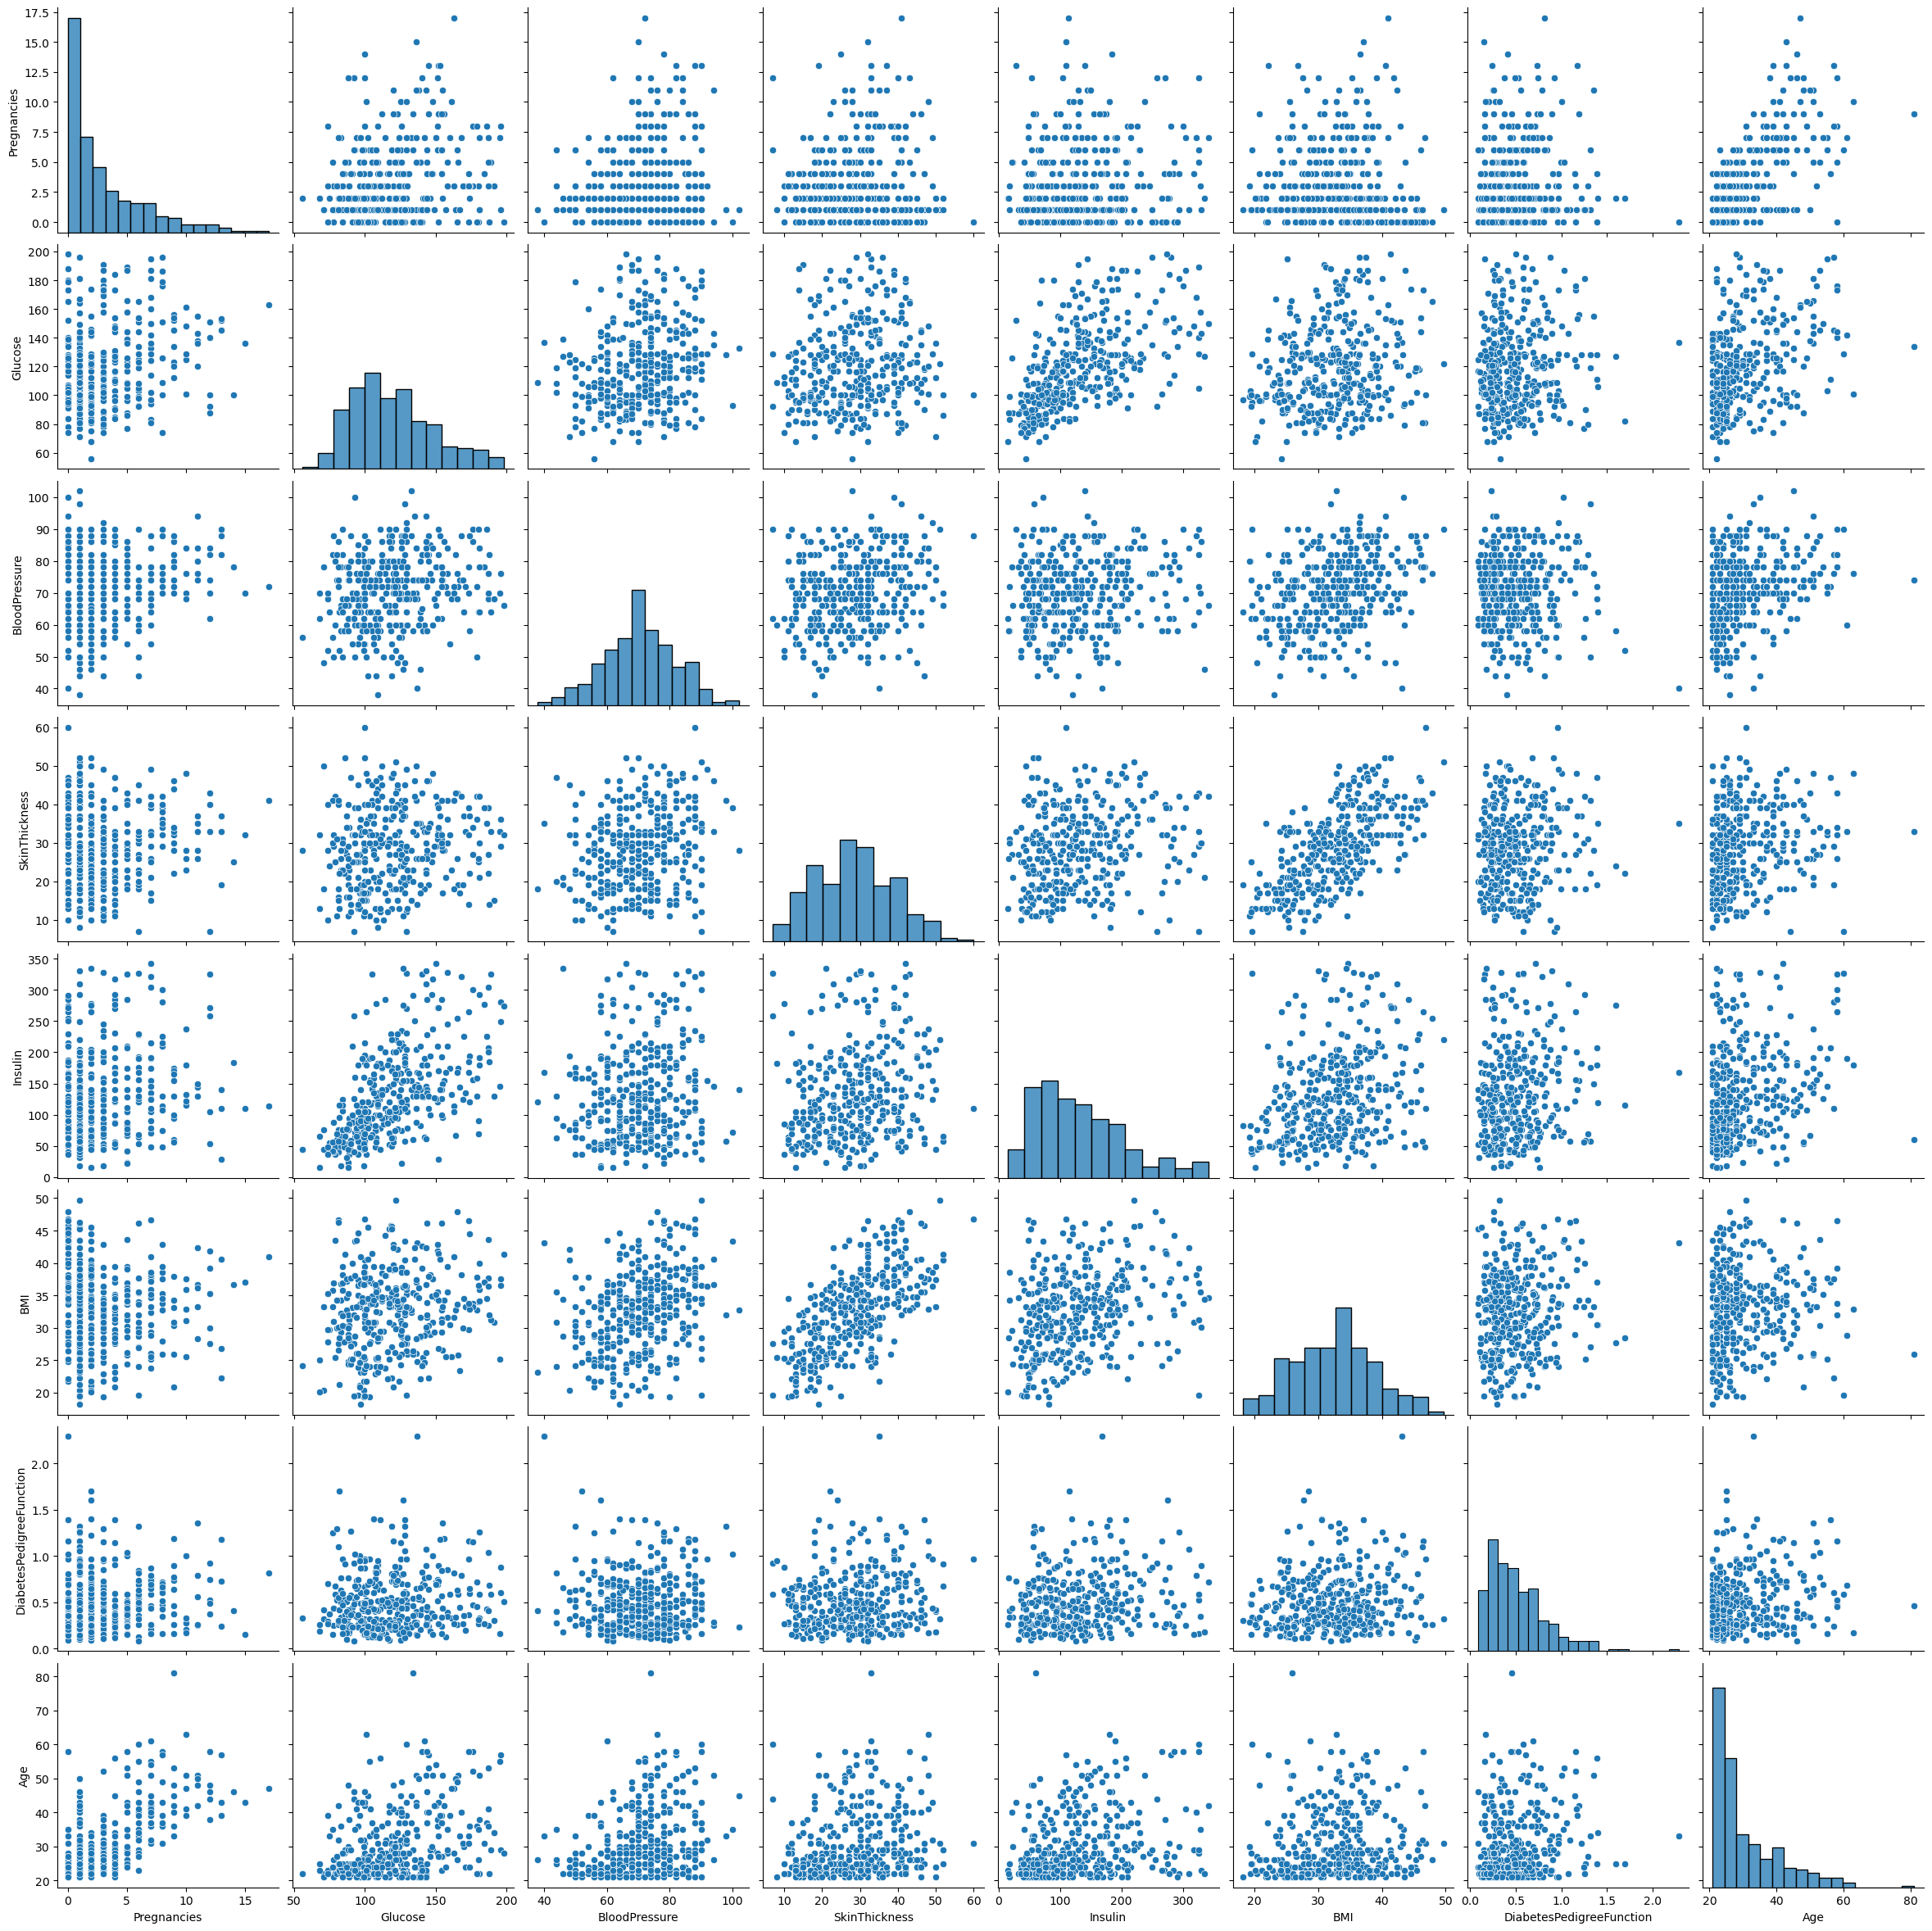

In [14]:
sns.pairplot(data, height=3)

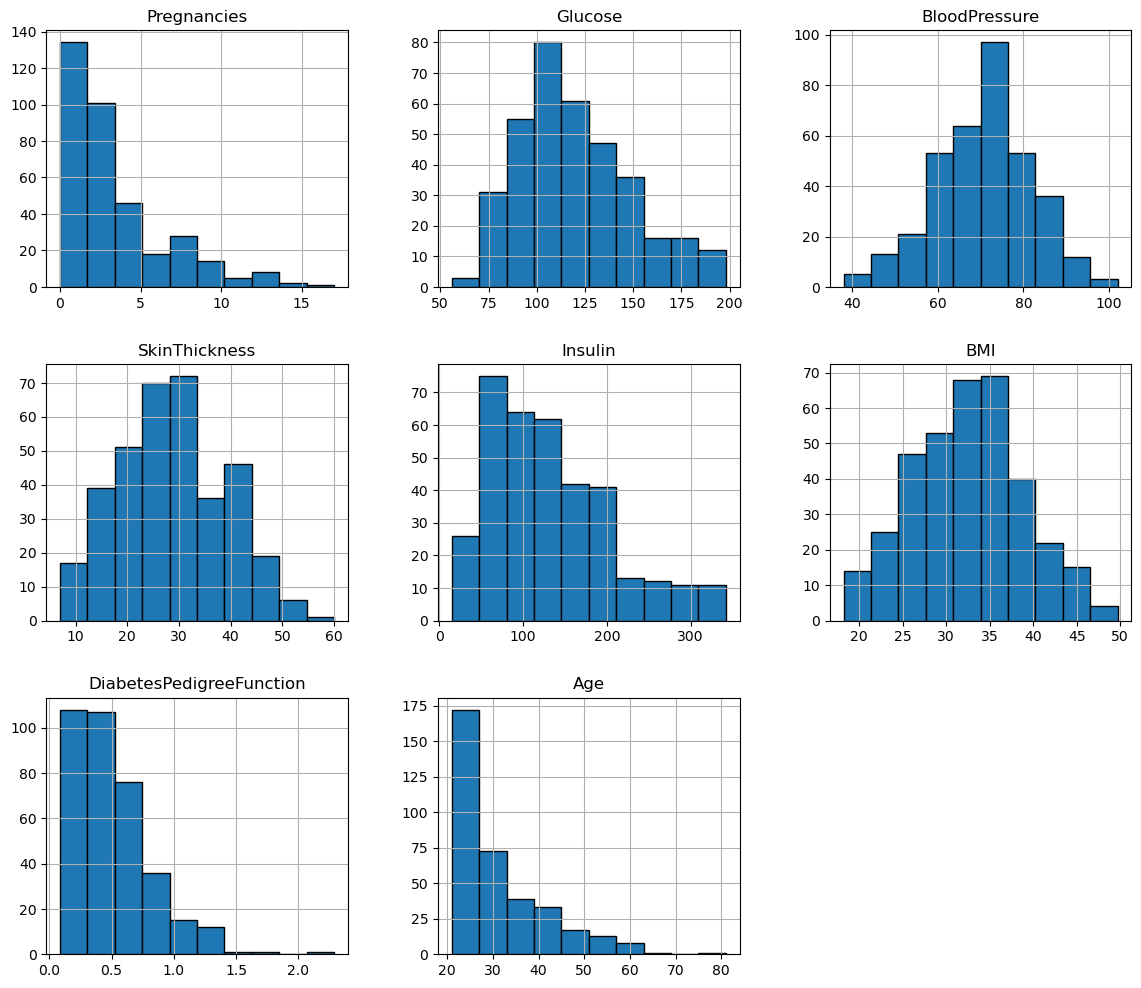

In [15]:
data.hist(edgecolor = 'Black', figsize = (14,12), bins = 10)
plt.show()

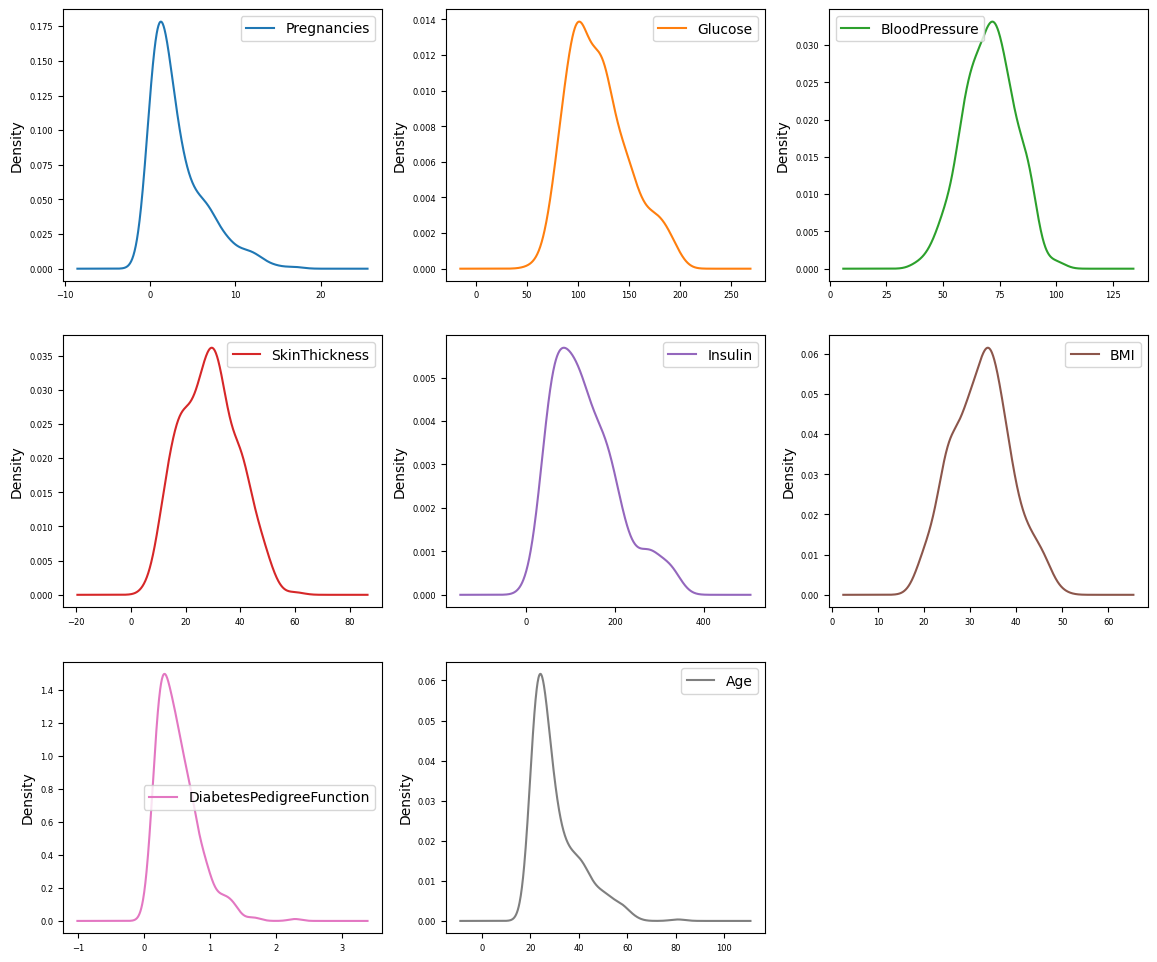

In [16]:
data.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, legend = True, fontsize = 6, figsize = (14, 12))
plt.show()

C:\Users\maria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maria\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

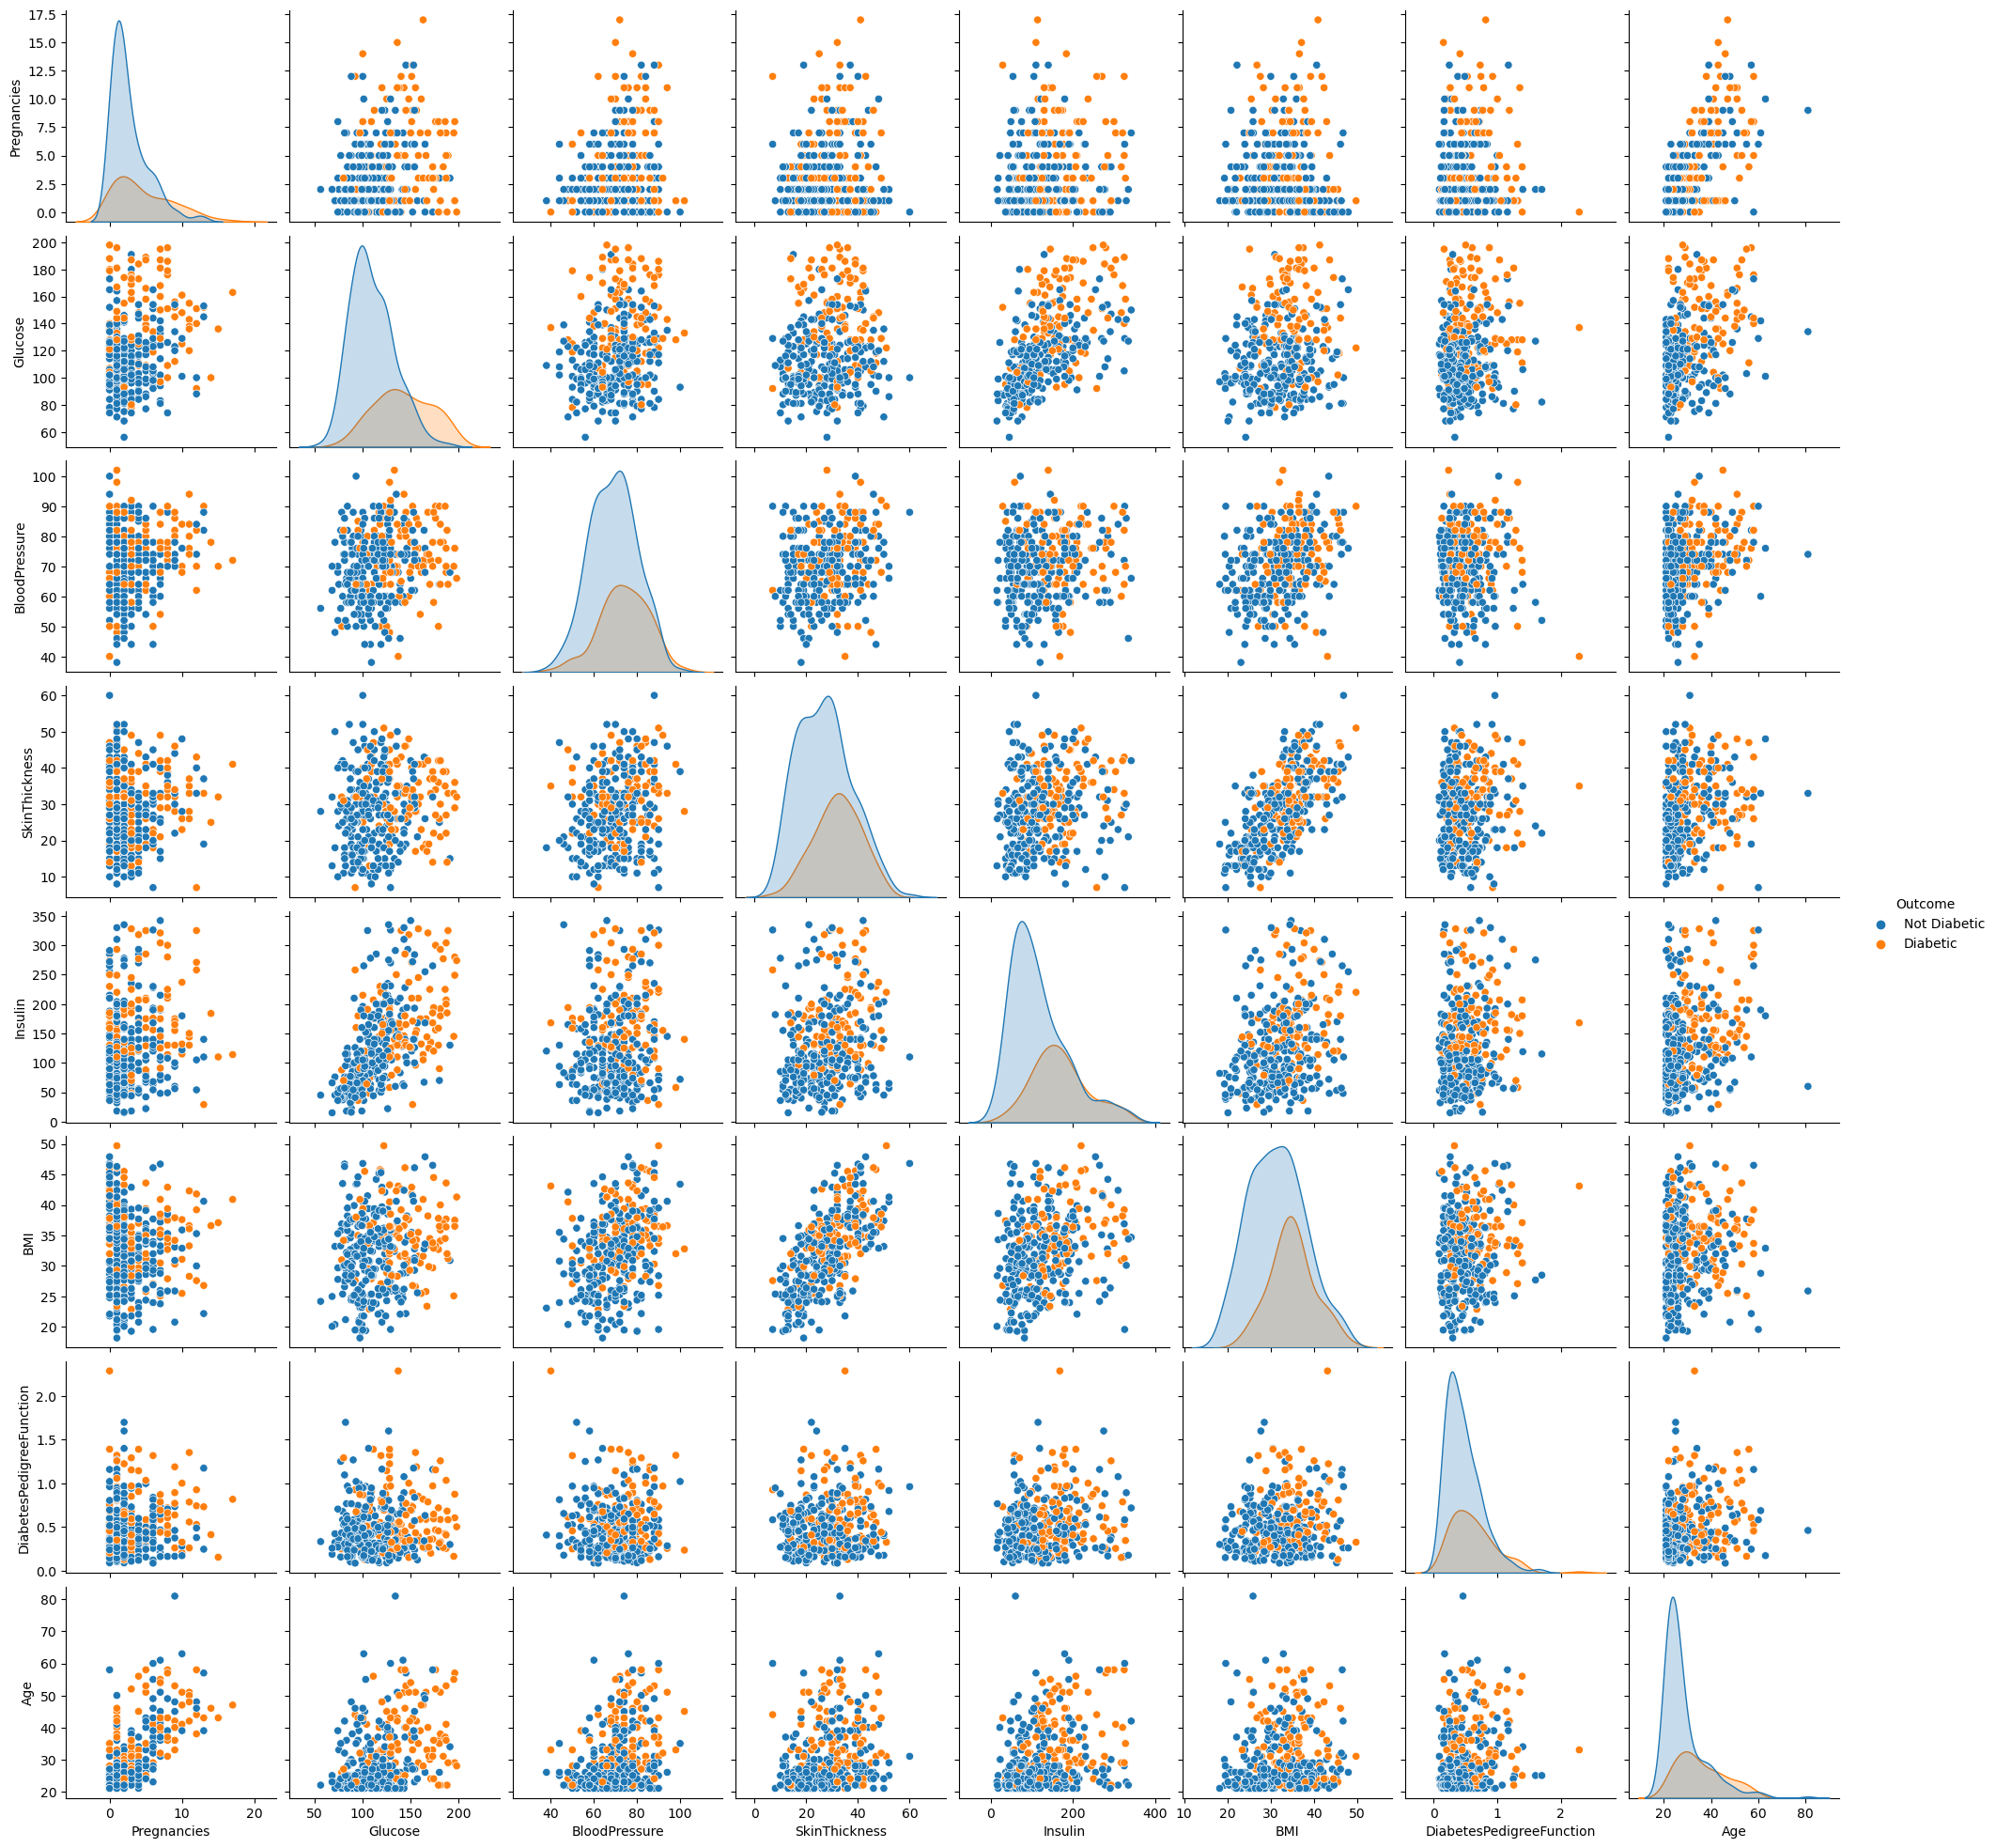

In [17]:
sns.pairplot(data, hue='Outcome')
plt.show()

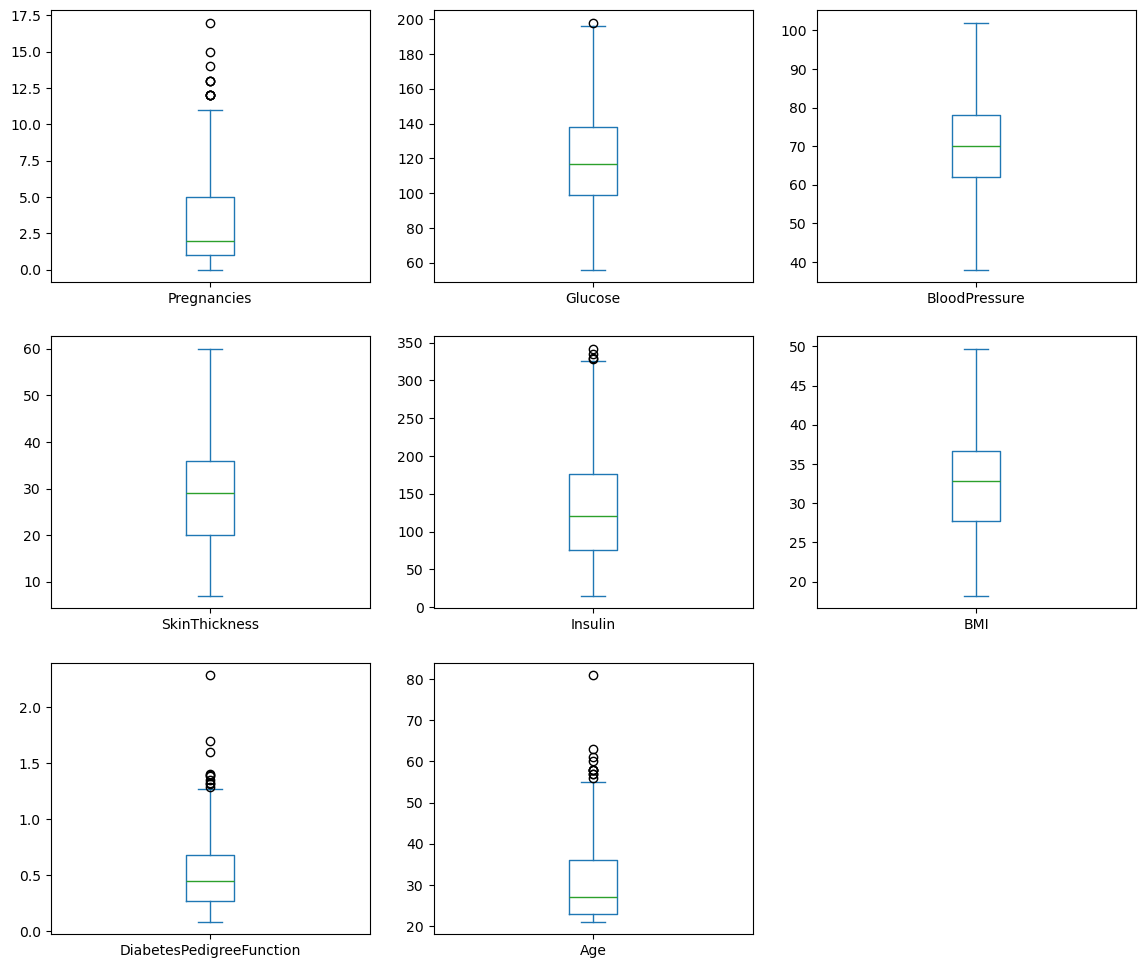

In [18]:
data.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, legend = True, fontsize = 10, figsize = (14, 12))
plt.show()

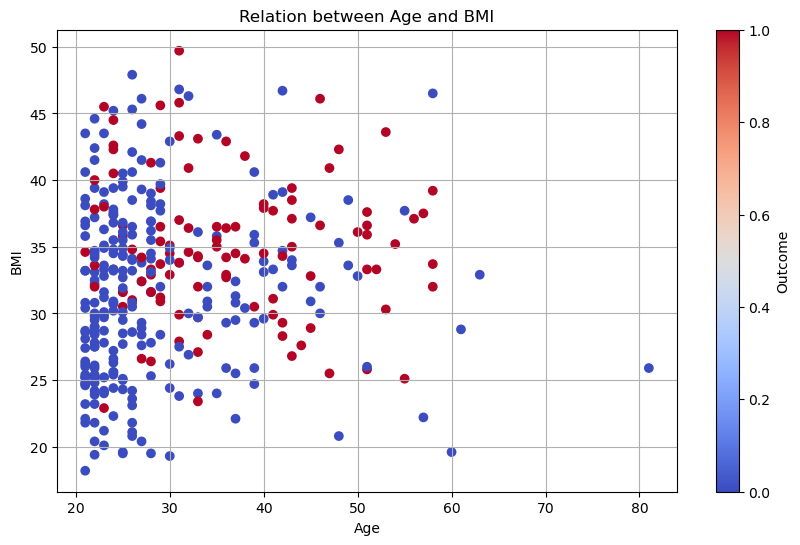

In [19]:
ages = data['Age']
bmi_values = data['BMI']
data['Outcome'] = data['Outcome'].map({'Not Diabetic': 0, 'Diabetic': 1})
plt.figure(figsize=(10, 6))
scatter_plot = plt.scatter(x=ages, y=bmi_values, c=data['Outcome'], cmap='coolwarm')
plt.colorbar(scatter_plot, label='Outcome')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Relation between Age and BMI')
plt.grid(True)
plt.show()

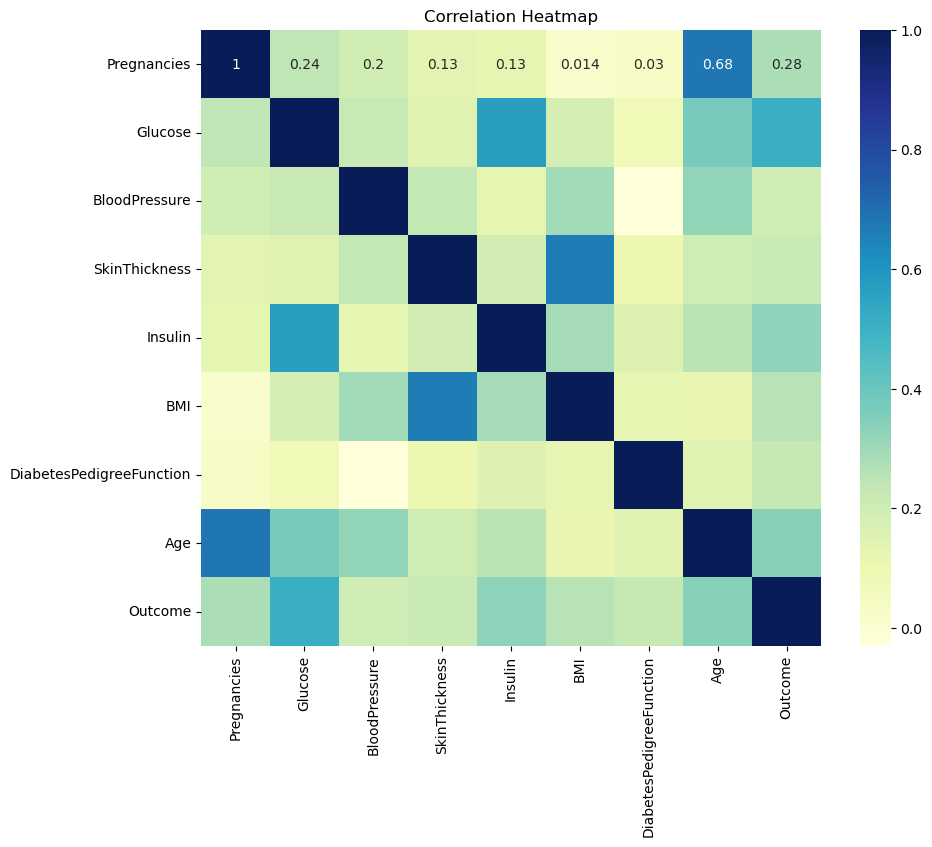

In [20]:
numeric_columns = data.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()